# Pavankumar kamble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df =pd.read_csv(r'D:\data science\data science assg\assg.8 PCA\wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine = df.iloc[:,1:]
wine2 = wine.values

In [5]:
def normalise(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
df_1 = normalise(wine2)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
pca_values = pca.fit_transform(df_1)


In [9]:
pca = PCA(n_components=6)
pca_values = pca.fit_transform(df_1)

In [10]:
var = pca.explained_variance_ratio_

In [11]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  ])

In [12]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

In [13]:
pca_values

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03,
        -1.48888758e-04,  4.03053940e-04,  3.38169644e-04],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03,
        -5.14346199e-04, -2.89365235e-04,  8.53629818e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04,
         5.43143625e-04,  2.26595764e-04,  4.00271299e-04],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03,
        -2.86969121e-03, -6.29415180e-04,  1.27986110e-04],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03,
        -2.20811844e-03, -1.64867643e-04, -6.00778246e-04],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03,
        -2.06741411e-03,  4.18760435e-06,  4.18863198e-04]])

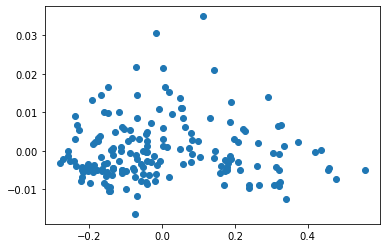

In [14]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y)

In [15]:
pc = pca_values[:,0:3]

# Hierarchical Clustering

In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [17]:
wine1 = pd.DataFrame(pca_values[:,0:1],columns = ['PC1'])
wine2= pd.DataFrame(pca_values[:,1:2],columns = ['PC2'])
wine3= pd.DataFrame(pca_values[:,2:3],columns = ['PC3'])


In [18]:
wine = pd.concat([wine1,wine2,wine3],axis=1) 
wine

,PC1,PC2,PC3
0,0.189635,0.012794,0.001864
1,0.180429,-0.003194,0.004062
2,0.260771,-0.003892,-0.000663
3,0.436486,0.000115,-0.000546
4,-0.006888,0.011007,-0.000330
...,...,...,...
173,-0.004155,-0.002703,-0.001473
174,0.001864,0.001390,-0.002566
175,0.052658,0.011177,-0.001332
176,0.055633,0.011114,-0.001065


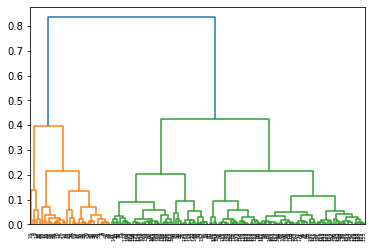

In [19]:
dendrogram = sch.dendrogram(sch.complete(wine))

In [20]:
pa = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
pa

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [21]:
y_pa = pa.fit_predict(pc)
Clusters=pd.DataFrame(y_pa,columns=['Clusters'])

In [22]:
wn2 = pd.concat([wine,Clusters], axis = 1)
wn2

,PC1,PC2,PC3,Clusters
0,0.189635,0.012794,0.001864,0
1,0.180429,-0.003194,0.004062,0
2,0.260771,-0.003892,-0.000663,0
3,0.436486,0.000115,-0.000546,0
4,-0.006888,0.011007,-0.000330,2
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,2
174,0.001864,0.001390,-0.002566,2
175,0.052658,0.011177,-0.001332,2
176,0.055633,0.011114,-0.001065,2


# Kmeans 

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wine)
    wcss.append(kmeans.inertia_)

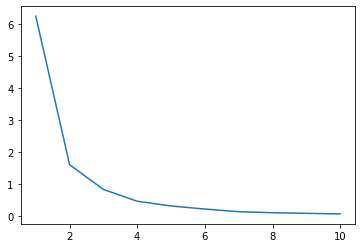

In [25]:
plt.plot(range(1,11),wcss)
plt.show()

In [26]:
model = KMeans(n_clusters=3).fit(wine)

In [28]:
r = model.labels_

In [29]:
df = pd.DataFrame(r ,columns=['Cluster2'] )
df

,Cluster2
0,1
1,1
2,1
3,1
4,2
...,...
173,2
174,2
175,2
176,2
